## MD MEHER HASSAN CHOWDHIRY
## 1155645
## The Entire Code solely done by me

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [25]:
##loading dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [26]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [27]:
##reshaping the dimension of array size
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

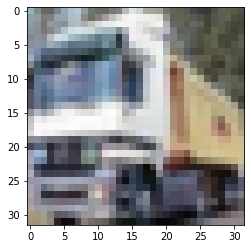

In [28]:
plt.imshow(X_train[1])

In [29]:
##increasing the contrast
X_train = X_train / 255.0
X_test = X_test / 255.0

In [30]:
import keras
from tensorflow.keras import Sequential
from tensorflow.keras import models,layers

In [31]:
## adding layers for cnn
cnn=models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3),activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(100,activation="relu"),
    layers.Dense(10,activation="softmax")
    
    
    
    
])

In [34]:
cnn.compile(
   optimizer="adam",
   loss="sparse_categorical_crossentropy",
   metrics=["accuracy"]

)
history=cnn.fit(X_train,y_train,epochs=5, validation_split=0.15, batch_size=32,verbose= 1)

Train on 42500 samples, validate on 7500 samples
Epoch 1/5
42500/42500 [==============================] - 55s 1ms/sample - loss: 0.5451 - accuracy: 0.8091 - val_loss: 0.7167 - val_accuracy: 0.7620
Epoch 2/5
42500/42500 [==============================] - 54s 1ms/sample - loss: 0.4845 - accuracy: 0.8300 - val_loss: 0.7680 - val_accuracy: 0.7449
Epoch 3/5
42500/42500 [==============================] - 59s 1ms/sample - loss: 0.4377 - accuracy: 0.8458 - val_loss: 0.8121 - val_accuracy: 0.7476
Epoch 4/5
42500/42500 [==============================] - 52s 1ms/sample - loss: 0.3922 - accuracy: 0.8622 - val_loss: 0.9206 - val_accuracy: 0.7208
Epoch 5/5
42500/42500 [==============================] - 54s 1ms/sample - loss: 0.3472 - accuracy: 0.8778 - val_loss: 0.9075 - val_accuracy: 0.7272


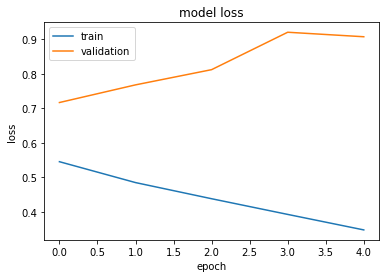

In [35]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

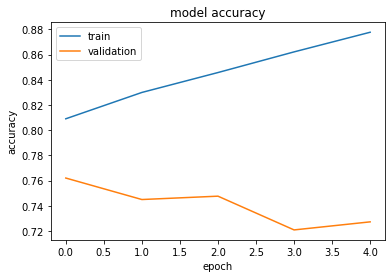

In [36]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [39]:
cnn.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 234us/sample - loss: 1.1384 - accuracy: 0.6877


[1.138423877620697, 0.6877]